<a href="https://colab.research.google.com/github/nicolasViniegraa/porfolio/blob/main/linear_regression/chicago_house_price_prediction/Chicago_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I've created a Linear Regresion model that predicts the price of houses. The dataset was obtained in kaggle.com <br>
https://www.kaggle.com/datasets/tawfikelmetwally/chicago-house-price

Note: Due to the low amount of data in the dataset if possible that the model doesn't develop a great accuracy

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Data Analysis

---



---



In [2]:
data = pd.read_csv('realest.csv')

data.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


We have the following variables:

Price: Price of the house <br>
Bedroom: Number of bedrooms <br>
Space: Size of the house (in square feet) <br>
Room: Number of rooms <br>
Lot: Width of a lot <br>
Tax: Amount of annual tax <br>
Bathroom: Number of bathrooms <br>
Garage: Number of garages <br>
Condition: Condition of house (1 if good , 0 otherwise) <br>

In [3]:
data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [4]:
data = data.dropna()

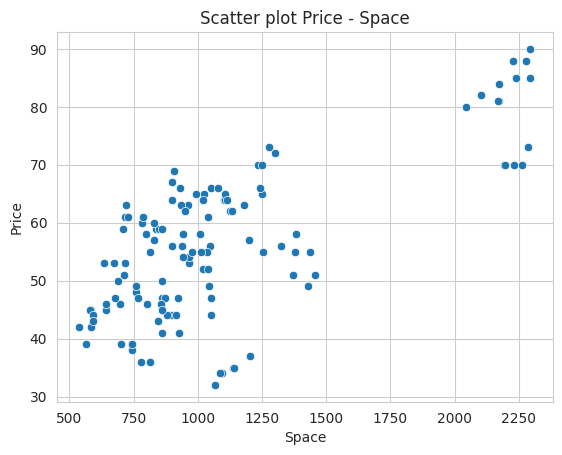

In [5]:
sns.scatterplot(x=data['Space'], y=data['Price'])
plt.xlabel('Space')
plt.ylabel('Price')
plt.title('Scatter plot Price - Space')
plt.show()

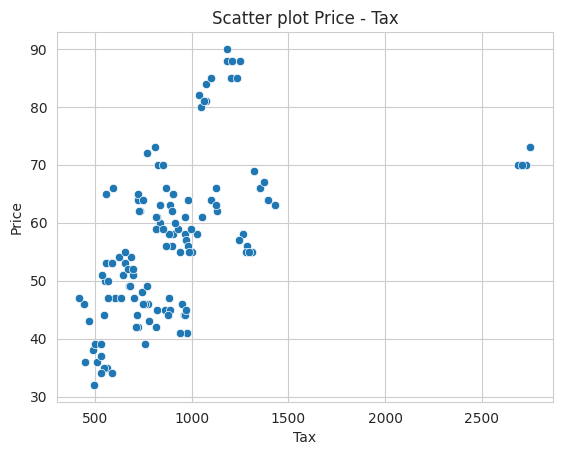

In [6]:
sns.scatterplot(x=data['Tax'], y=data['Price'])
plt.xlabel('Tax')
plt.ylabel('Price')
plt.title('Scatter plot Price - Tax')
plt.show()

After analyzing the above scatter plots, we see that there are some outliers in "Tax" and "Space", but after testing removing them, I saw a decrease in the model performance, so I kept them to get the best performance possible



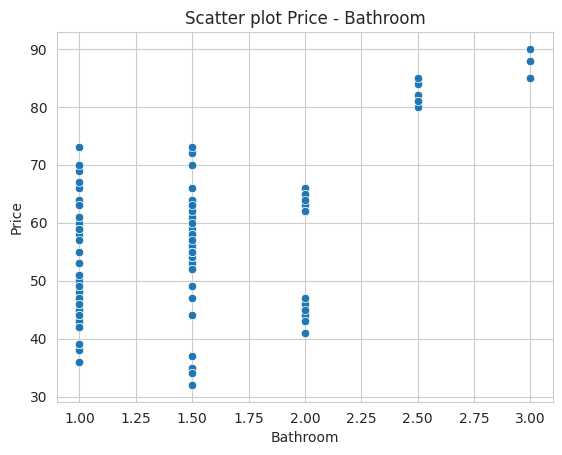

In [7]:
sns.scatterplot(x=data['Bathroom'], y=data['Price'])
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.title('Scatter plot Price - Bathroom')
plt.show()

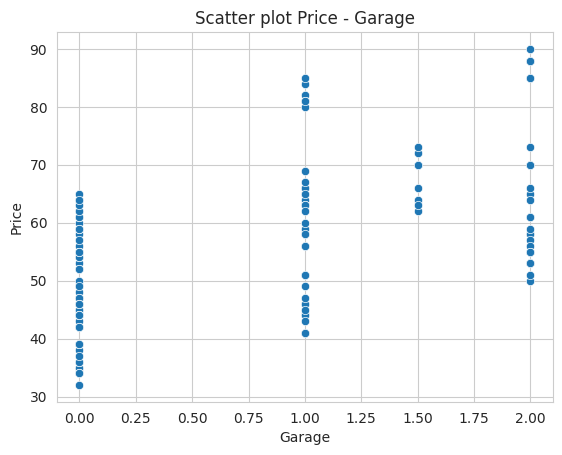

In [8]:
sns.scatterplot(x=data['Garage'], y=data['Price'])
plt.xlabel('Garage')
plt.ylabel('Price')
plt.title('Scatter plot Price - Garage')
plt.show()

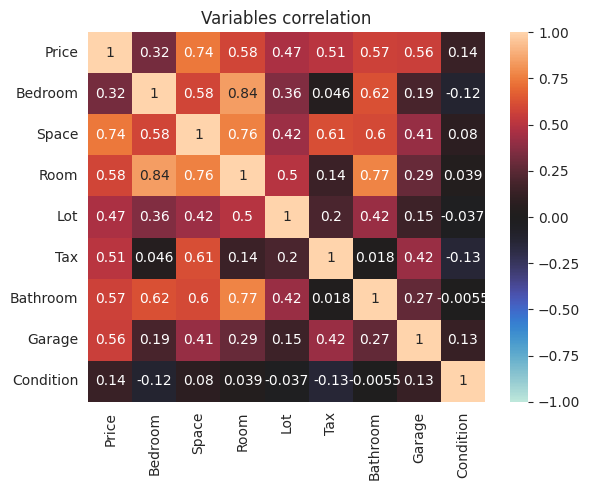

In [9]:
corr = data.corr()
plt.title("Variables correlation")
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

Analyzing the correlation between the variables, we see that almost all the variables have an important correlation with the "Price" excluding the "Condition" variable.

Also we see that there are high correlations between "Room" and "Bedroom", "Space" and "Bathroom"

Although high correlations normally can drop the performance of a model, in this exercise, after testing models with and without these attributes, I reached to the conclusion that the model that has better performance is the one that includes all the attributes.

# **Preprocessing**

---



---



In [10]:
#Split data in X and y attributes
X_data = data[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]
y_data = data['Price']

In [11]:
#Normalize the X attributes
scaler = StandardScaler()
scaler.fit(X_data)
scaled_data = scaler.transform(X_data)

Normalize data for better perfomance of the model

# **Model creation and evaluation**

---



---



In [12]:
max_acc = 0
best_size = 0


#Since we are working with a low amount of data, we can train several times the model with different test dataset sizes, to
#see which size gives the better performance
for size in [0.15, 0.2, 0.25, 0.3, 0.35]:

  #Split the data in train and test datasets
  X_train, X_test, y_train, y_test = train_test_split(scaled_data, y_data, random_state=42, test_size=size)

  #Create the linear regression model
  reg = LinearRegression().fit(X_train, y_train)

  #Evaluate accuracy of the model
  score = reg.score(X_test, y_test)

  if score > max_acc:
    max_acc = score
    best_size = size

print("The best accuracy is obtained with a test size of {} and is {}".format(best_size, '{}%'.format(round(max_acc*100, 2))))

The best accuracy is obtained with a test size of 0.25 and is 70.13%


We didn't get a great accuracy, probably because of the low amount of data, surely the model would improve if it was fed with a larger amount of data, but still it was a good exercise